In [516]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [328]:
df = pd.read_csv(r"C:\Users\yuvaraj\Web scrapping\used_bikes_data.csv")

In [330]:
df.head(10)

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
0,2023,Yezdi RoadsterByadmin,Roadster,"1,65,000",10000,First,Delhi
1,2019,Royal Enfield,Thunderbird 350 ABS,"1,10,000",40000,Second,Noida
2,2022,Hero Electric,Optima CX Dual Battery,"80,000",5000,First,Kolkata
3,2015,Mahindra Gusto,DX,"17,000",35000,First,Mumbai
4,2014,Honda CB,Trigger DLX,"45,000",30000,First,Mumbai
5,2023,Honda SP,125,"85,000",5000,First,Noida
6,2021,Royal Enfield,Interceptor 650 Ravishing Red,"2,40,000",10000,First,Bangalore
7,2022,Royal Enfield,Bullet 350 X Electric Start,"1,75,000",15000,First,Bangalore
8,2017,Honda CB,Hornet 160R BS4 Special Edition CBS,"60,000",33000,First,Pune
9,20212018,KTM,200 Duke STD 2018 – 2020,"1,60,000",30000,First,Bangalore


In [332]:
df.isna().sum()

Manufactured_Year    0
Brand                0
Model                4
Selling_Price        0
KM_Driven            0
Ownership            4
Location             4
dtype: int64

In [334]:
df[df['Model'].isna()]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
107,2019,Harley,NaN,"3,50,000",10000,First,Pune
119,2019,Harley,NaN,"3,50,000",10000,First,Pune
385,2018,Harley,NaN,"4,50,000",15000,Second,Bangalore
397,2018,Harley,NaN,"4,50,000",15000,Second,Bangalore


In [336]:
df['Model'].fillna("X400",inplace=True)

C:\Users\yuvaraj\AppData\Local\Temp\ipykernel_17880\648804651.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [338]:
df[(df['Model']=='X400') & (df['Brand']=="Harley")]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
107,2019,Harley,X400,"3,50,000",10000,First,Pune
119,2019,Harley,X400,"3,50,000",10000,First,Pune
385,2018,Harley,X400,"4,50,000",15000,Second,Bangalore
397,2018,Harley,X400,"4,50,000",15000,Second,Bangalore


In [340]:
df.describe()

,Manufactured_Year,KM_Driven
count,4.080000e+02,408.000000
mean,6.922266e+09,26506.357843
std,3.676488e+10,22499.810153
min,2.011000e+03,1010.000000
25%,2.016000e+03,10000.000000
50%,2.020000e+03,20000.000000
75%,2.022000e+03,35000.000000
max,2.018202e+11,120000.000000


In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Manufactured_Year  408 non-null    int64 
 1   Brand              408 non-null    object
 2   Model              408 non-null    object
 3   Selling_Price      408 non-null    object
 4   KM_Driven          408 non-null    int64 
 5   Ownership          404 non-null    object
 6   Location           404 non-null    object
dtypes: int64(2), object(5)
memory usage: 22.4+ KB


# Managin Null values and noisy data

In [345]:
df['Selling_Price']=df['Selling_Price'].str.replace('[,.]','',regex=True)

In [349]:
df['Selling_Price']=df['Selling_Price'].astype('int32')

In [351]:
df['Selling_Price'].dtype

dtype('int32')

In [353]:
df['Manufactured_Year'].value_counts()

Manufactured_Year
2021            68
2022            58
2018            42
2023            34
2016            26
2019            26
2015            22
2017            22
2020            20
2012            16
2013            14
2011            14
2014            12
2024            10
201820162018     4
20212018         2
20182019         2
201820142018     2
20152013         2
201720122021     2
20182018         2
201320132016     2
20172013         2
201820122021     2
201720152018     2
Name: count, dtype: int64

In [355]:
df[df['Manufactured_Year']==201820162018]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
128,201820162018,Bajaj Dominar,400 (2016-2018) ABS,150000,10000,First,Bangalore
140,201820162018,Bajaj Dominar,400 (2016-2018) ABS,150000,10000,First,Bangalore
203,201820162018,Bajaj Dominar,400 (2016-2018) ABS,110000,30000,First,Ahmedabad
215,201820162018,Bajaj Dominar,400 (2016-2018) ABS,110000,30000,First,Ahmedabad


In [357]:
df[df['Ownership'].isna()]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
50,2014,Royal Enfield,Bullet 350 ES ABS BS4,110000,120000,NaN,NaN
62,2014,Royal Enfield,Bullet 350 ES ABS BS4,110000,120000,NaN,NaN
250,2011,Yamaha YZF,R15 Version 2.0,50000,30000,NaN,NaN
262,2011,Yamaha YZF,R15 Version 2.0,50000,30000,NaN,NaN


In [359]:
df[df['Brand']=='Royal Enfield']

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
1,2019,Royal Enfield,Thunderbird 350 ABS,110000,40000,Second,Noida
6,2021,Royal Enfield,Interceptor 650 Ravishing Red,240000,10000,First,Bangalore
7,2022,Royal Enfield,Bullet 350 X Electric Start,175000,15000,First,Bangalore
13,2019,Royal Enfield,Thunderbird 350 ABS,110000,40000,Second,Noida
18,2021,Royal Enfield,Interceptor 650 Ravishing Red,240000,10000,First,Bangalore
19,2022,Royal Enfield,Bullet 350 X Electric Start,175000,15000,First,Bangalore
34,2019,Royal Enfield,Interceptor 650 Silver Spectre,200000,20000,First,Delhi
46,2019,Royal Enfield,Interceptor 650 Silver Spectre,200000,20000,First,Delhi
50,2014,Royal Enfield,Bullet 350 ES ABS BS4,110000,120000,NaN,NaN
55,2018,Royal Enfield,Thunderbird 350 ABS,140000,20000,First,Agra


In [361]:
df['Ownership'].fillna(method='ffill',inplace = True)

C:\Users\yuvaraj\AppData\Local\Temp\ipykernel_17880\1798753930.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\yuvaraj\AppData\Local\Temp\ipykernel_17880\1798753930.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [363]:
df.isna().sum()

Manufactured_Year    0
Brand                0
Model                0
Selling_Price        0
KM_Driven            0
Ownership            0
Location             4
dtype: int64

In [365]:
df['Location'].value_counts().nlargest(5)

Location
Delhi        72
Bangalore    46
Mumbai       42
Hyderabad    36
Pune         32
Name: count, dtype: int64

In [367]:
df['Location'].fillna(df['Location'].mode()[0],inplace=True)

C:\Users\yuvaraj\AppData\Local\Temp\ipykernel_17880\3879254974.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [369]:
df.isna().sum()

Manufactured_Year    0
Brand                0
Model                0
Selling_Price        0
KM_Driven            0
Ownership            0
Location             0
dtype: int64

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Manufactured_Year  408 non-null    int64 
 1   Brand              408 non-null    object
 2   Model              408 non-null    object
 3   Selling_Price      408 non-null    int32 
 4   KM_Driven          408 non-null    int64 
 5   Ownership          408 non-null    object
 6   Location           408 non-null    object
dtypes: int32(1), int64(2), object(4)
memory usage: 20.8+ KB


In [373]:
df["Manufactured_Year"] = df["Manufactured_Year"].astype(str)
df["Manufactured_Year"] = df["Manufactured_Year"].str.extract(r"(\b19\d{2}|20\d{2}\b)")


# Outliers

In [376]:
df.select_dtypes(exclude="object")

,Selling_Price,KM_Driven
0,165000,10000
1,110000,40000
2,80000,5000
3,17000,35000
4,45000,30000
...,...,...
403,80000,30000
404,90000,5000
405,190000,1800
406,10000,100000


<Axes: >

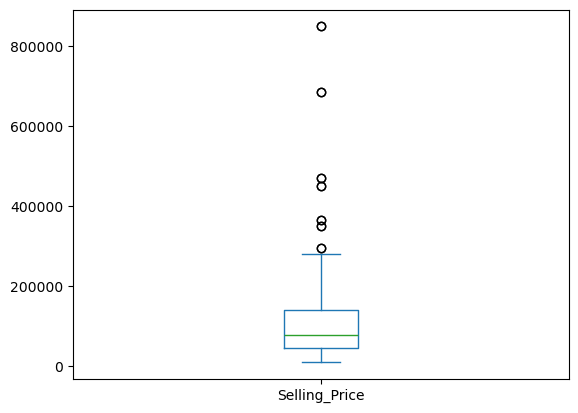

In [378]:
df['Selling_Price'].plot(kind = 'box')

In [379]:
df[df['Selling_Price']>=300000]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
100,2023,Kawasaki Ninja,300,365000,1125,First,Mumbai
107,2019,Harley,X400,350000,10000,First,Pune
112,2023,Kawasaki Ninja,300,365000,1125,First,Mumbai
119,2019,Harley,X400,350000,10000,First,Pune
149,2023,Hero Splendor,Plus i3s,850000,90000,First,Bangalore
161,2023,Hero Splendor,Plus i3s,850000,90000,First,Bangalore
178,2019,Benelli TNT,600i BS4 ABS BS4,470000,20000,Third,Delhi
190,2019,Benelli TNT,600i BS4 ABS BS4,470000,20000,Third,Delhi
220,2015,Ducati Monster,795 STD,685000,19200,Second,Delhi
232,2015,Ducati Monster,795 STD,685000,19200,Second,Delhi


In [382]:
df.loc[(df['Brand'] == 'Hero Splendor') & (df['Selling_Price'] == 850000), 'Selling_Price'] = 57000


In [384]:
df[df['Brand'] == 'Hero Splendor']


,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
32,2016,Hero Splendor,PRO Self Spoke,30000,30000,Second,Faridabad
44,2016,Hero Splendor,PRO Self Spoke,30000,30000,Second,Faridabad
105,2022,Hero Splendor,Plus XTEC,55000,26758,First,Ghaziabad
117,2022,Hero Splendor,Plus XTEC,55000,26758,First,Ghaziabad
123,2021,Hero Splendor,Plus Self with Alloy Wheel and i3S,70000,30000,First,Delhi
135,2021,Hero Splendor,Plus Self with Alloy Wheel and i3S,70000,30000,First,Delhi
149,2023,Hero Splendor,Plus i3s,57000,90000,First,Bangalore
161,2023,Hero Splendor,Plus i3s,57000,90000,First,Bangalore
386,2021,Hero Splendor,Plus Black and Accent,65000,40000,First,Faridabad
398,2021,Hero Splendor,Plus Black and Accent,65000,40000,First,Faridabad


In [386]:
df.shape

(408, 7)

# Dulipicate Handling

In [389]:
df[df.duplicated()]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
12,2023,Yezdi RoadsterByadmin,Roadster,165000,10000,First,Delhi
13,2019,Royal Enfield,Thunderbird 350 ABS,110000,40000,Second,Noida
14,2022,Hero Electric,Optima CX Dual Battery,80000,5000,First,Kolkata
15,2015,Mahindra Gusto,DX,17000,35000,First,Mumbai
16,2014,Honda CB,Trigger DLX,45000,30000,First,Mumbai
...,...,...,...,...,...,...,...
403,2022,Honda SP,125,80000,30000,First,Hyderabad
404,2022,BGauss D,D15 i,90000,5000,First,Chennai
405,2023,Royal Enfield,Hunter 350 Metro Rebel,190000,1800,First,Hyderabad
406,2011,Hero Honda,CD Dawn,10000,100000,Second,Hyderabad


In [391]:
df.loc[(df['Brand'] == 'Yezdi RoadsterByadmin') & (df['Model'] == 'Roadster')]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
0,2023,Yezdi RoadsterByadmin,Roadster,165000,10000,First,Delhi
12,2023,Yezdi RoadsterByadmin,Roadster,165000,10000,First,Delhi
80,2022,Yezdi RoadsterByadmin,Roadster,200000,5000,First,Pune
92,2022,Yezdi RoadsterByadmin,Roadster,200000,5000,First,Pune


In [393]:
df.drop_duplicates(inplace=True)

In [395]:
df.shape

(203, 7)

In [397]:
df

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
0,2023,Yezdi RoadsterByadmin,Roadster,165000,10000,First,Delhi
1,2019,Royal Enfield,Thunderbird 350 ABS,110000,40000,Second,Noida
2,2022,Hero Electric,Optima CX Dual Battery,80000,5000,First,Kolkata
3,2015,Mahindra Gusto,DX,17000,35000,First,Mumbai
4,2014,Honda CB,Trigger DLX,45000,30000,First,Mumbai
...,...,...,...,...,...,...,...
391,2022,Honda SP,125,80000,30000,First,Hyderabad
392,2022,BGauss D,D15 i,90000,5000,First,Chennai
393,2023,Royal Enfield,Hunter 350 Metro Rebel,190000,1800,First,Hyderabad
394,2011,Hero Honda,CD Dawn,10000,100000,Second,Hyderabad


In [399]:
df.reset_index(drop=True,inplace=True)

In [401]:
df

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
0,2023,Yezdi RoadsterByadmin,Roadster,165000,10000,First,Delhi
1,2019,Royal Enfield,Thunderbird 350 ABS,110000,40000,Second,Noida
2,2022,Hero Electric,Optima CX Dual Battery,80000,5000,First,Kolkata
3,2015,Mahindra Gusto,DX,17000,35000,First,Mumbai
4,2014,Honda CB,Trigger DLX,45000,30000,First,Mumbai
...,...,...,...,...,...,...,...
198,2022,Honda SP,125,80000,30000,First,Hyderabad
199,2022,BGauss D,D15 i,90000,5000,First,Chennai
200,2023,Royal Enfield,Hunter 350 Metro Rebel,190000,1800,First,Hyderabad
201,2011,Hero Honda,CD Dawn,10000,100000,Second,Hyderabad


# Discriptive Statistics

- the Average Km driven by whole data

In [405]:
df['KM_Driven'].mean()

26612.300492610837

# 12 Anaylsis of Top 5 bike Brand Average Selling Price

# Top 5 Brand Average Selling Price

- The bar chart shows the average selling prices of bikes from different brands. Bajaj Dominar has the highest average price, around ₹140,000, making it a premium model. BGauss D and Bajaj Pulsar follow with prices near ₹90,000 and ₹80,000, respectively. More affordable brands like Bajaj Discover and Bajaj Platina have lower average prices, offering budget-friendly options.

<Axes: xlabel='Brand'>

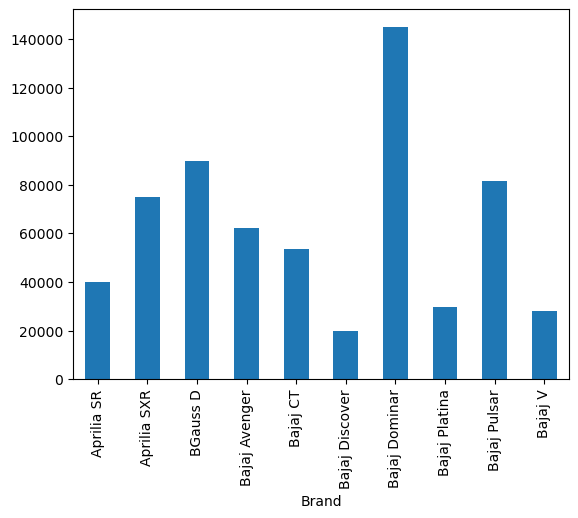

In [409]:
df.groupby(by='Brand')['Selling_Price'].mean().head(10).plot(kind="bar")


# 13. Analysis of Vehicle Registrations by Year

- Most of the Vehiles Registered in years

The pie chart displays the percentage of vehicle registrations by year. 2021 leads with 29.3%, followed by 2022 at 23.6% and 2018 at 22.0%. 2023 and 2019 have smaller shares, representing 13.8% and 11.4%, respectively. This highlights that most vehicles were registered in 2021, making it the peak year for registrations.

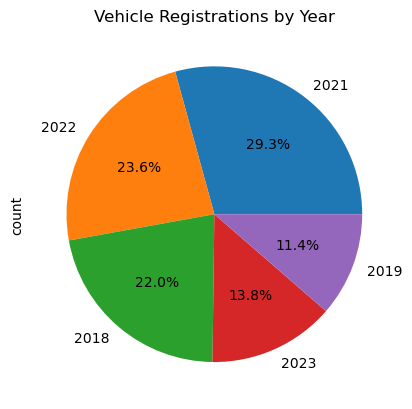

In [413]:
df['Manufactured_Year'].value_counts().nlargest(5).plot(kind="pie",autopct='%.1f%%')
plt.title('Vehicle Registrations by Year')
plt.show()

# UNIVARIAT ANALYSIS

# CATEGORICAL

In [417]:
df.select_dtypes(include=object)

,Manufactured_Year,Brand,Model,Ownership,Location
0,2023,Yezdi RoadsterByadmin,Roadster,First,Delhi
1,2019,Royal Enfield,Thunderbird 350 ABS,Second,Noida
2,2022,Hero Electric,Optima CX Dual Battery,First,Kolkata
3,2015,Mahindra Gusto,DX,First,Mumbai
4,2014,Honda CB,Trigger DLX,First,Mumbai
...,...,...,...,...,...
198,2022,Honda SP,125,First,Hyderabad
199,2022,BGauss D,D15 i,First,Chennai
200,2023,Royal Enfield,Hunter 350 Metro Rebel,First,Hyderabad
201,2011,Hero Honda,CD Dawn,Second,Hyderabad


# 1 Analysis of Frequency Distribution of Years

# The top eight years with the highest number of bike registrations are
- The frequency distribution of bikes by registered year shows how the number of bike registrations varies across different years.
- The year 2021 recorded the highest number of bike registrations

-The bar graph shows the frequency distribution of bike registrations by year, highlighting the top eight years with the highest number of registrations. 2021 recorded the highest number of bike registrations, followed by 2022 and 2018, indicating a peak in recent years. The graph also shows a gradual decline in registrations for older years, with 2015 and 2017 having the lowest frequencies among the years displayed

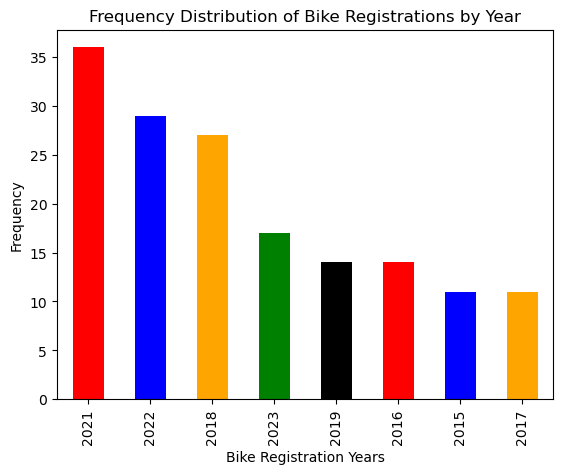

In [421]:
df['Manufactured_Year'].value_counts().nlargest(8).plot(kind='bar',color=['red','blue','orange','green','black'])
plt.xlabel('Bike Registration Years')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Bike Registrations by Year')
plt.show()

# 2. Analysis of top 10 Bike Brands

# The following are the top 10 bike brands for sales of used bikes.

- The bar graph shows that Royal Enfield leads the used bike market with the highest number of sales, followed by Bajaj Pulsar and Yamaha FZ. Mid-range brands like KTM, Bajaj Avenger, and TVS Apache also have a notable presence. Brands such as Honda CB, Suzuki Gixxer, and Yamaha YZF have fewer used bikes available, indicating lower turnover in the second-hand market.

Text(0.5, 1.0, 'Frequency distribution of Bike Brands')

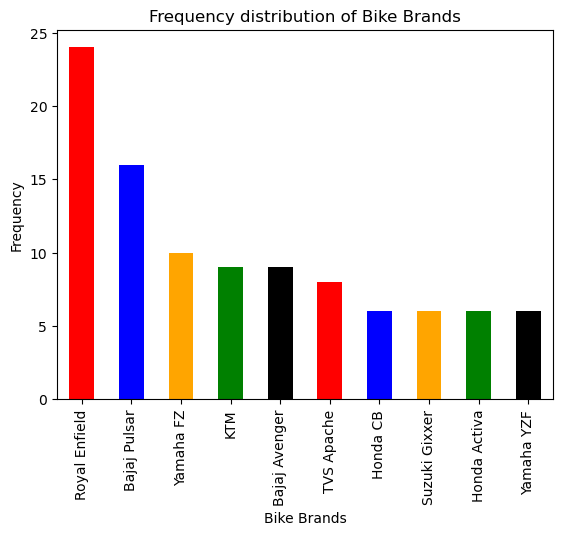

In [425]:
df['Brand'].value_counts().nlargest(10).plot(kind='bar',color=['red','blue','orange','green','black'])
plt.xlabel('Bike Brands')
plt.ylabel('Frequency')
plt.title('Frequency distribution of Bike Brands')

# 3. `''' Analysis of Owned Bikes '''`

# There are more first-owned bikes available for sale compared to second or later-owned bikes.
- Majority of Bikes for Sale Are First-Owned
-  first-owned bikes may dominate the used bike market, potentially offering buyers vehicles with clearer maintenance histories and less wear and tear compared to bikes with multiple previous owners.

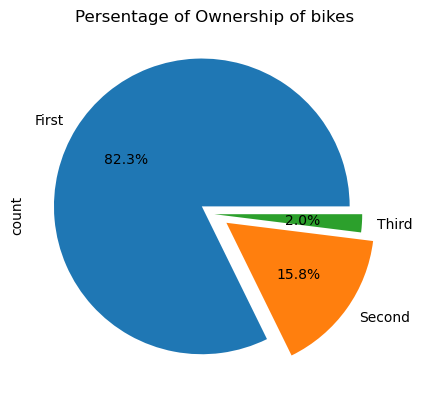

In [428]:
df['Ownership'].value_counts().plot(kind='pie',autopct='%.1f%%',
                                 explode=[0.1,0.1,0])
plt.title("Persentage of Ownership of bikes")
plt.show()

# 4. Analysis of locations of used bikes available for sale

# These top 8 locations of used bikes available for sale
- Delhi has the highest number of used bikes available for sale. 

- Delhi has the highest number of used bikes available for sale, indicating a larger market for pre-owned two-wheelers compared to other locations. This could be due to the city's high population density, greater commuting needs, and a larger number of bike owners, resulting in a higher turnover of used bikes.

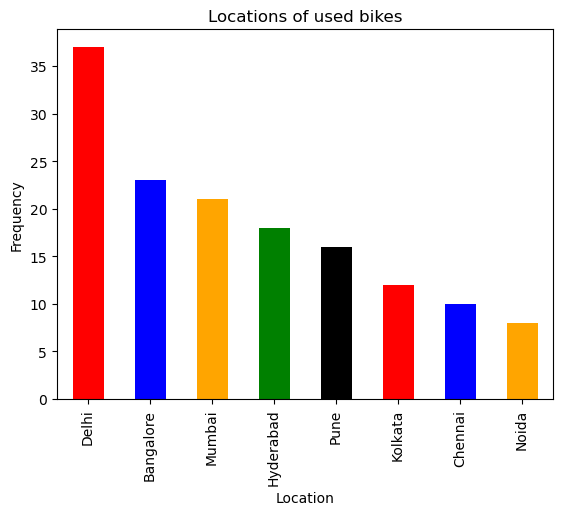

In [432]:
df['Location'].value_counts().nlargest(8).plot(kind='bar',color=['red','blue','orange','green','black'])
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Locations of used bikes')
plt.show()

# 9. This the dashboard of every categorical variable for Uni variat analysis  

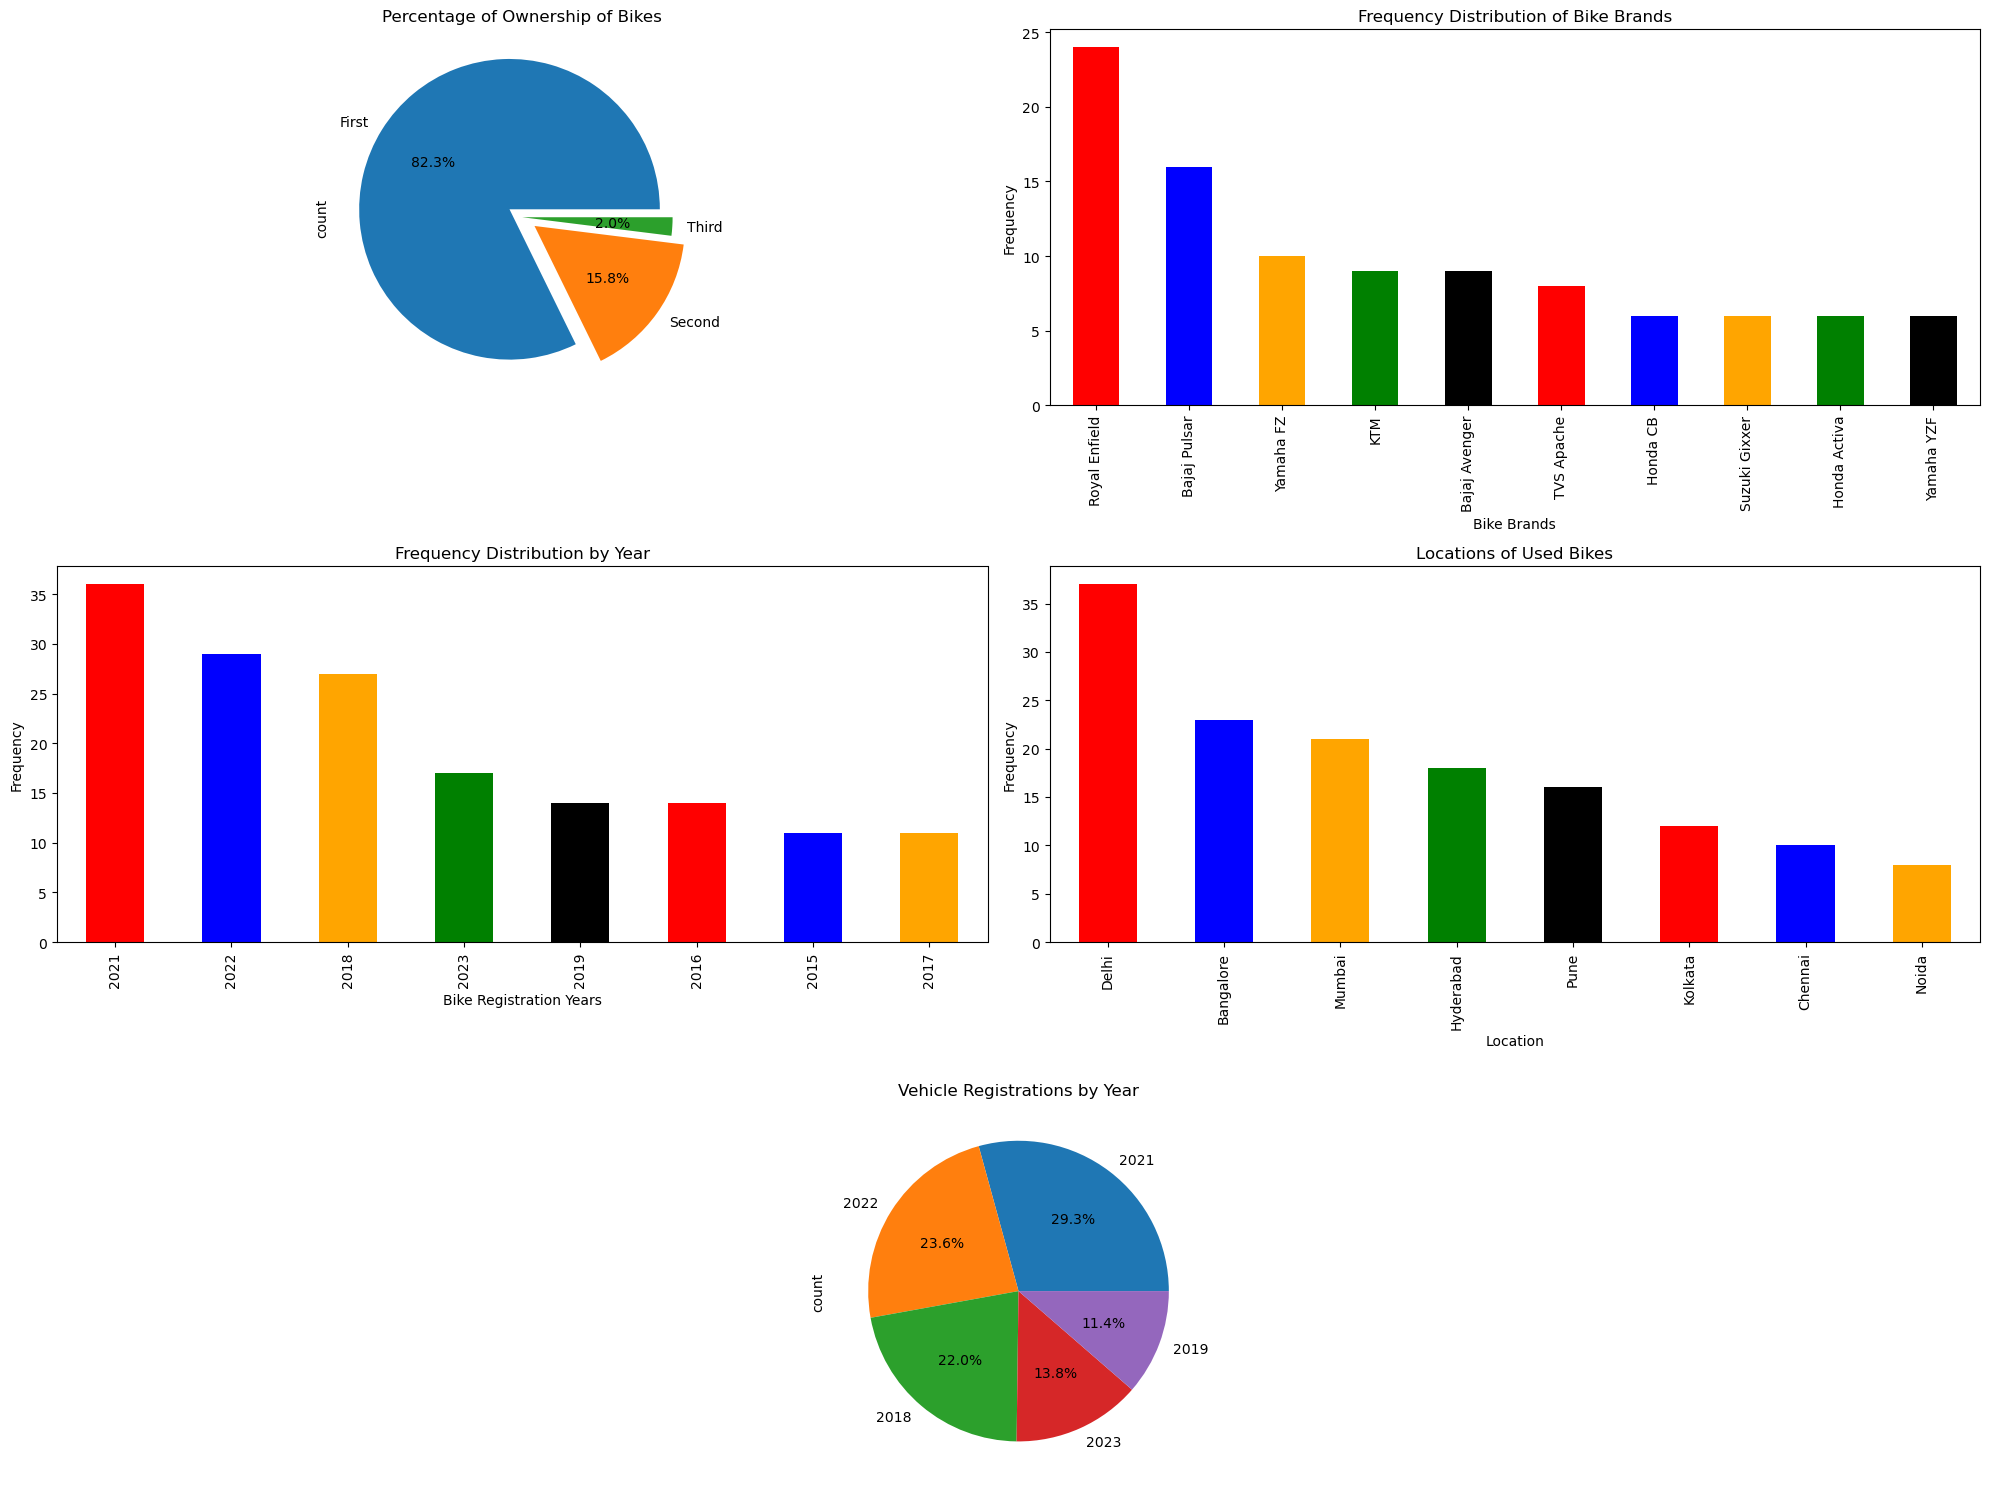

In [523]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Subplot 1: Ownership pie chart
plt.subplot(3, 2, 1)
df['Ownership'].value_counts().plot(kind='pie', autopct='%.1f%%', explode=[0.1, 0.1, 0])
plt.title("Percentage of Ownership of Bikes")

# Subplot 2: Bike Brands frequency bar chart
plt.subplot(3, 2, 2)
df['Brand'].value_counts().nlargest(10).plot(kind='bar', color=['red', 'blue', 'orange', 'green', 'black'])
plt.xlabel('Bike Brands')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Bike Brands')

# Subplot 3: Bike Registration Years frequency bar chart
plt.subplot(3, 2, 3)
df['Manufactured_Year'].value_counts().nlargest(8).plot(kind='bar', color=['red', 'blue', 'orange', 'green', 'black'])
plt.xlabel('Bike Registration Years')
plt.ylabel('Frequency')
plt.title('Frequency Distribution by Year')

# Subplot 4: Locations of used bikes bar chart
plt.subplot(3, 2, 4)
df['Location'].value_counts().nlargest(8).plot(kind='bar', color=['red', 'blue', 'orange', 'green', 'black'])
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Locations of Used Bikes')

# Subplot 5: Vehicle Registrations by Year pie chart (spanning full width)
plt.subplot(3, 2, (5, 6))
df['Manufactured_Year'].value_counts().nlargest(5).plot(kind="pie", autopct='%.1f%%')
plt.title('Vehicle Registrations by Year')

# Apply tight layout and show the plots
plt.tight_layout()
plt.show()

# Uni- Variant anaylsis
# Numerical

In [437]:
df.select_dtypes(exclude='object')

,Selling_Price,KM_Driven
0,165000,10000
1,110000,40000
2,80000,5000
3,17000,35000
4,45000,30000
...,...,...
198,80000,30000
199,90000,5000
200,190000,1800
201,10000,100000


# 5. Analysis of Kilometer driven by Bikes

# Frequency distribution of Kilometer driven by Bikes

- The graph displays the frequency distribution of kilometres driven by bikes, showing that most bikes fall within the 0 to 40,000 km range. The highest frequency is between 10,000 and 20,000 km, indicating that this is the most common range for used bikes. The frequency gradually decreases for higher km driven, with fewer bikes having driven over 60,000 km, highlighting that high-kilometre driven bikes are less common in the market.

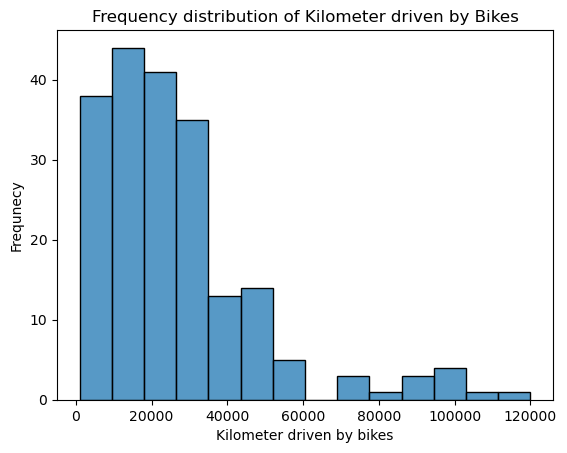

In [441]:
sns.histplot(data=df,x='KM_Driven')
plt.xlabel('Kilometer driven by bikes')
plt.ylabel('Frequnecy')
plt.title('Frequency distribution of Kilometer driven by Bikes')
plt.show()

# 6 Analysis of Kilometer driven by Bikes by the ownership

- more kilometers driven by the first owned bikes 
- The graph shows that first-owned bikes have the highest frequency and cover a wider range of kilometers, often driven up to 100,000 km or more. Second-owned bikes are moderately driven, mostly between 10,000 to 40,000 km, while third-owned bikes have the lowest frequency and mileage. This indicates that first-owned bikes tend to accumulate more kilometers before being sold

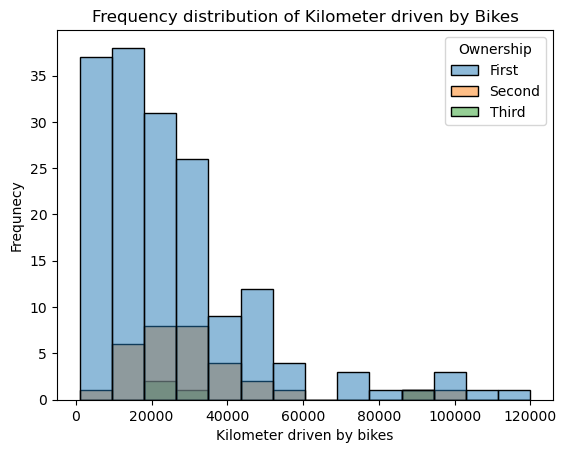

In [443]:
sns.histplot(data=df,x='KM_Driven',hue='Ownership')
plt.xlabel('Kilometer driven by bikes')
plt.ylabel('Frequnecy')
plt.title('Frequency distribution of Kilometer driven by Bikes')
plt.show()

In [444]:
df[df['Selling_Price']>200000]

,Manufactured_Year,Brand,Model,Selling_Price,KM_Driven,Ownership,Location
6,2021,Royal Enfield,Interceptor 650 Ravishing Red,240000,10000,First,Bangalore
51,2022,KTM,390 Adventure,280000,20000,Second,Hyderabad
52,2023,Kawasaki Ninja,300,365000,1125,First,Mumbai
59,2019,Harley,X400,350000,10000,First,Pune
62,2021,Jawa PerakByadmin,Perak,210000,15000,First,Jaipur
78,2022,TVS Apache,RR 310 ABS,255000,5000,First,Hyderabad
93,2019,Benelli TNT,600i BS4 ABS BS4,470000,20000,Third,Delhi
101,2022,Yezdi Adventure,Slick Silver,220000,15000,First,Bangalore
111,2015,Ducati Monster,795 STD,685000,19200,Second,Delhi
133,2023,Royal Enfield,Classic 350 Dark Series With Dual-Channel,230000,7500,First,Hyderabad


<Axes: xlabel='Selling_Price'>

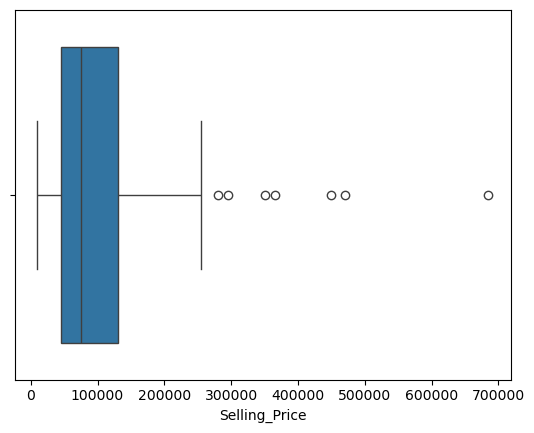

In [491]:
sns.boxplot(data=df,x='Selling_Price')

# 7 analysis of Distribution of Bike Selling Prices

- The graph displays the distribution of bike selling prices in the used bike market. The density curve shows that the majority of bikes are sold at lower price ranges, with the peak occurring below ₹200,000. As the price increases, the density decreases significantly, indicating fewer bikes in higher price ranges. The graph also shows occasional small spikes at higher price points, suggesting the presence of some premium or high-end bikes in the market.

- The graph shows that most used bikes are sold at lower price ranges, with the highest density below ₹200,000.

Text(0.5, 1.0, 'Distribution of Bike Selling Prices')

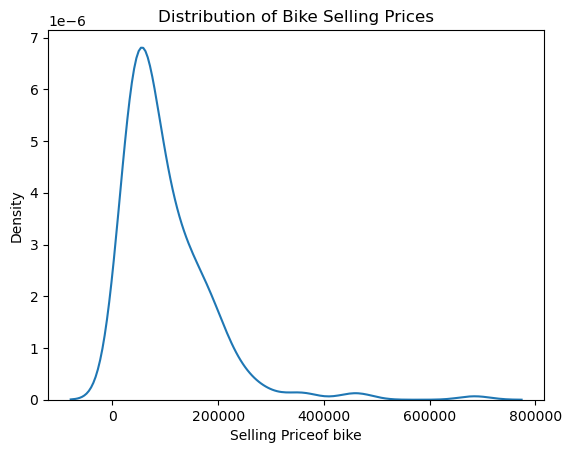

In [448]:
sns.kdeplot(data=df,x='Selling_Price')
plt.xlabel('Selling Priceof bike')
plt.title('Distribution of Bike Selling Prices')

# 8. Analysis of Distribution of Bike Selling Prices by Ownership

- The graph shows the distribution of bike selling prices categorized by ownership type. First-owned bikes dominate the lower price range, with a sharp peak indicating higher density around ₹100,000 to ₹200,000. Second-owned bikes have a broader and lower density distribution, suggesting moderate pricing. Third-owned bikes have minimal density, indicating they are fewer in number and spread across a wider price range.

- First-owned bikes have the highest density at lower price ranges, while second- and third-owned bikes are fewer and spread across a broader price range.

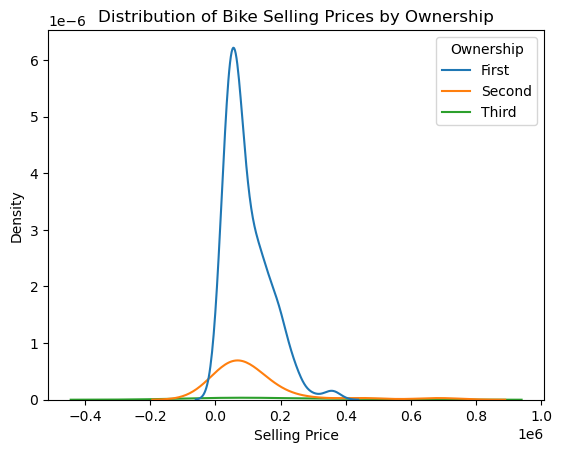

In [451]:
sns.kdeplot(data=df,x='Selling_Price',hue='Ownership')
plt.title('Distribution of Bike Selling Prices by Ownership')
plt.xlabel('Selling Price')
plt.show()

# 10 . Dashboard of every Numerical Analysis of Uni variat Analysis

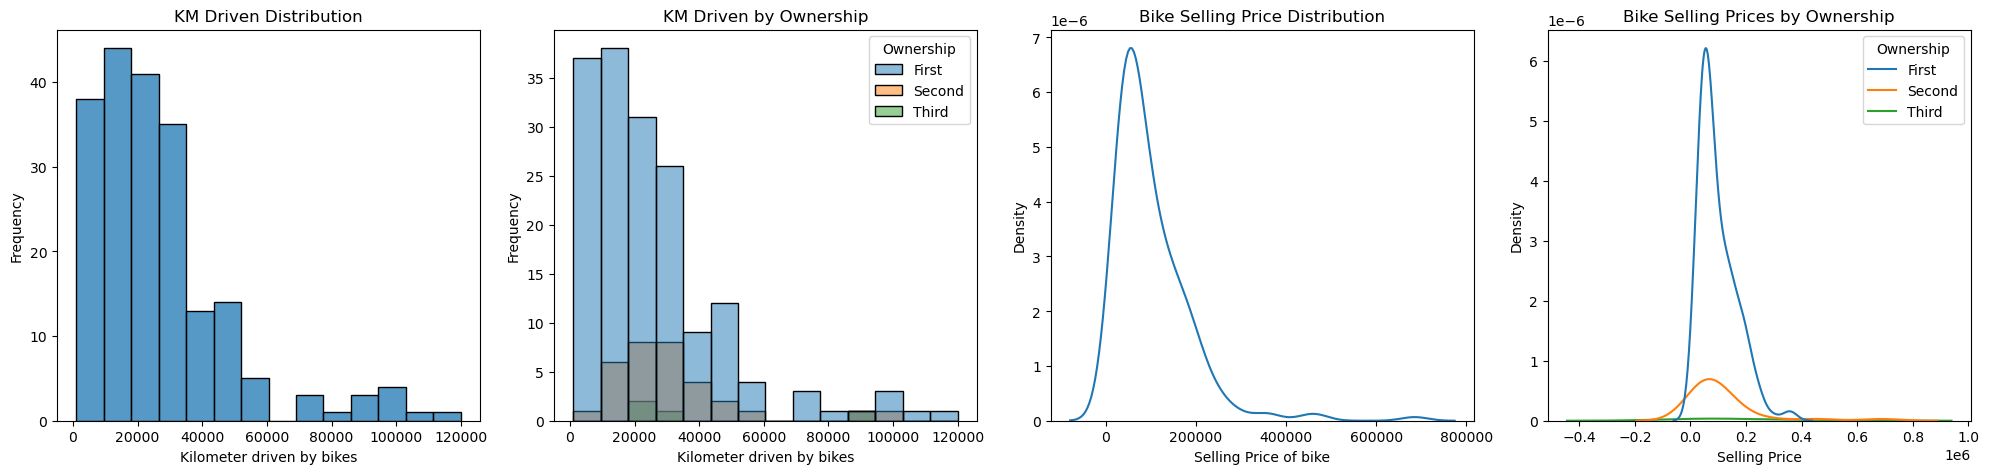

In [513]:
plt.figure(figsize=(20, 5))

# Subplot 1
plt.subplot(1, 4, 1)  # 1 row, 4 columns, 1st plot
sns.histplot(data=df, x='KM_Driven')
plt.xlabel('Kilometer driven by bikes')
plt.ylabel('Frequency')
plt.title('KM Driven Distribution')

# Subplot 2
plt.subplot(1, 4, 2)  # 1 row, 4 columns, 2nd plot
sns.histplot(data=df, x='KM_Driven', hue='Ownership')
plt.xlabel('Kilometer driven by bikes')
plt.ylabel('Frequency')
plt.title('KM Driven by Ownership')

# Subplot 3
plt.subplot(1, 4, 3)  # 1 row, 4 columns, 3rd plot
sns.kdeplot(data=df, x='Selling_Price')
plt.xlabel('Selling Price of bike')
plt.title('Bike Selling Price Distribution')

# Subplot 4
plt.subplot(1, 4, 4)  # 1 row, 4 columns, 4th plot
sns.kdeplot(data=df, x='Selling_Price', hue='Ownership')
plt.title('Bike Selling Prices by Ownership')
plt.xlabel('Selling Price')

# Adjust layout
plt.tight_layout()
plt.show()

# bi variant analysis

# numerical and numerical

In [454]:
df.select_dtypes(exclude='object')

,Selling_Price,KM_Driven
0,165000,10000
1,110000,40000
2,80000,5000
3,17000,35000
4,45000,30000
...,...,...
198,80000,30000
199,90000,5000
200,190000,1800
201,10000,100000


# 14. Correlation Between Selling Price and Kilometers Driven

- The scatter plot shows a negative correlation between selling price and kilometers driven, with higher usage leading to lower prices. Most vehicles cluster around lower prices and lower kilometers, while a few outliers have high prices despite high kilometers.

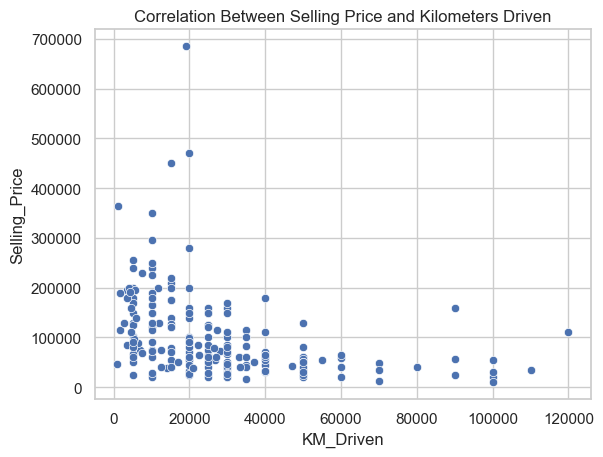

In [618]:
sns.scatterplot(data=df,x='KM_Driven',y='Selling_Price')
plt.title('Correlation Between Selling Price and Kilometers Driven')
plt.show()

# Bi variat anaylsis
# Categorical and Numerical 

In [539]:
df.columns

Index(['Manufactured_Year', 'Brand', 'Model', 'Selling_Price', 'KM_Driven',
       'Ownership', 'Location'],
      dtype='object')

# 15. Analysing the Selling Price trend by Year

# key observation
Prices tend to decrease for older models, but not uniformly.
Some years show significant price spikes, possibly indicating the sale of premium vehicles.
The variation (shaded region) is larger in some years, reflecting inconsistent pricing trends.

- The solid line indicates the average selling price for each registration year.
- The shaded region shows the confidence interval or variation range in selling prices, highlighting the uncertainty or fluctuation in price values.

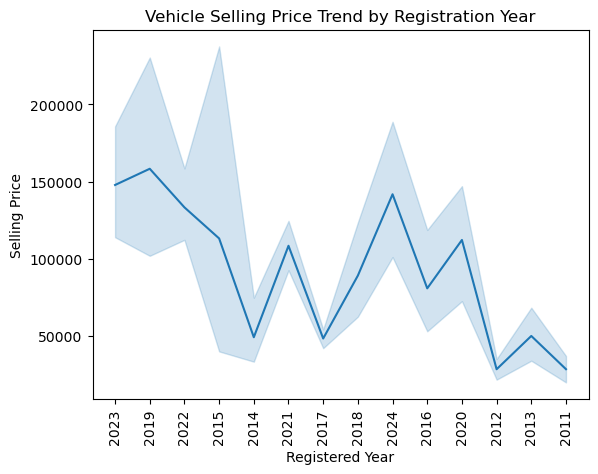

In [549]:
sns.lineplot(data=df,x='Manufactured_Year',y='Selling_Price')
plt.xticks(rotation = 90)
plt.xlabel('Registered Year')
plt.ylabel('Selling Price')
plt.title('Vehicle Selling Price Trend by Registration Year')
plt.show()

# 16. Anaylsis of displays the distribution of kilometers driven (KM_Driven) across different ownership types (First, Second, and Third)

This violin plot displays the distribution of kilometers driven (KM_Driven) across different ownership types (First, Second, and Third).
First ownership vehicles show a broader spread, indicating more variability in KM driven.
Second and Third ownership vehicles generally have higher KM driven, with a wider range and more outliers.
The shape of the violins highlights the density of data—wider areas indicate more vehicles at specific KM ranges.

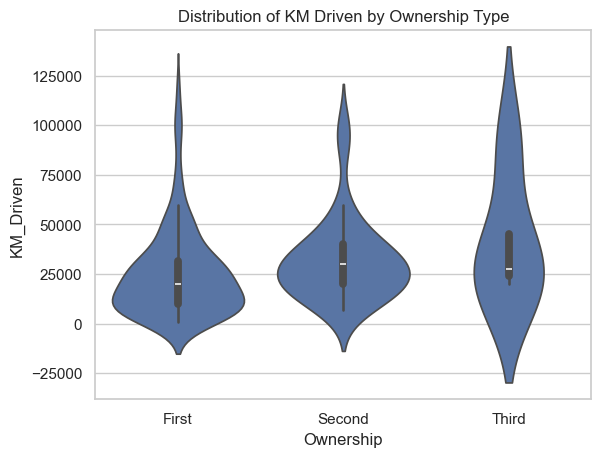

In [646]:
sns.violinplot(x='Ownership', y='KM_Driven', data=df)
plt.title('Distribution of KM Driven by Ownership Type')
plt.show()

# 17. Analysis Selling Price Distribution Across Bike Brands

This box plot shows the distribution of selling prices for different bike brands.

Royal Enfield and KTM have higher median prices, with some premium models causing noticeable outliers.
Brands like Honda Activa and TVS Apache have lower median prices, indicating more affordable models.
The presence of outliers (dots) suggests that certain brands have premium or luxury models priced significantly higher than the average.

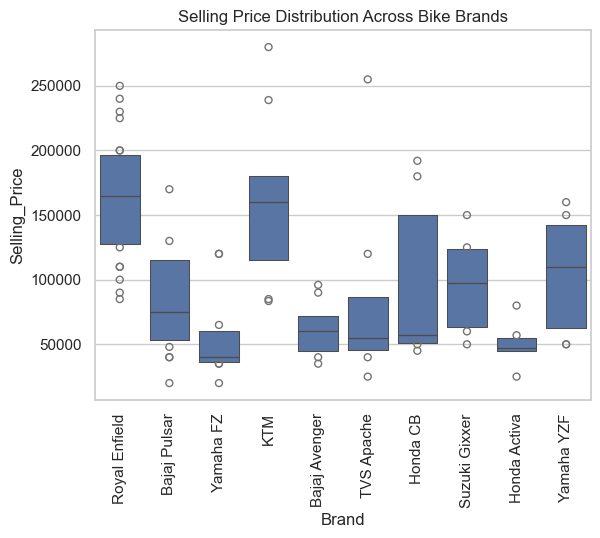

In [641]:
sns.boxenplot(x='Brand', y='Selling_Price', data=df,order=df['Brand'].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.title('Selling Price Distribution Across Bike Brands')
plt.show()

# dasboard of categorical and numerical plots

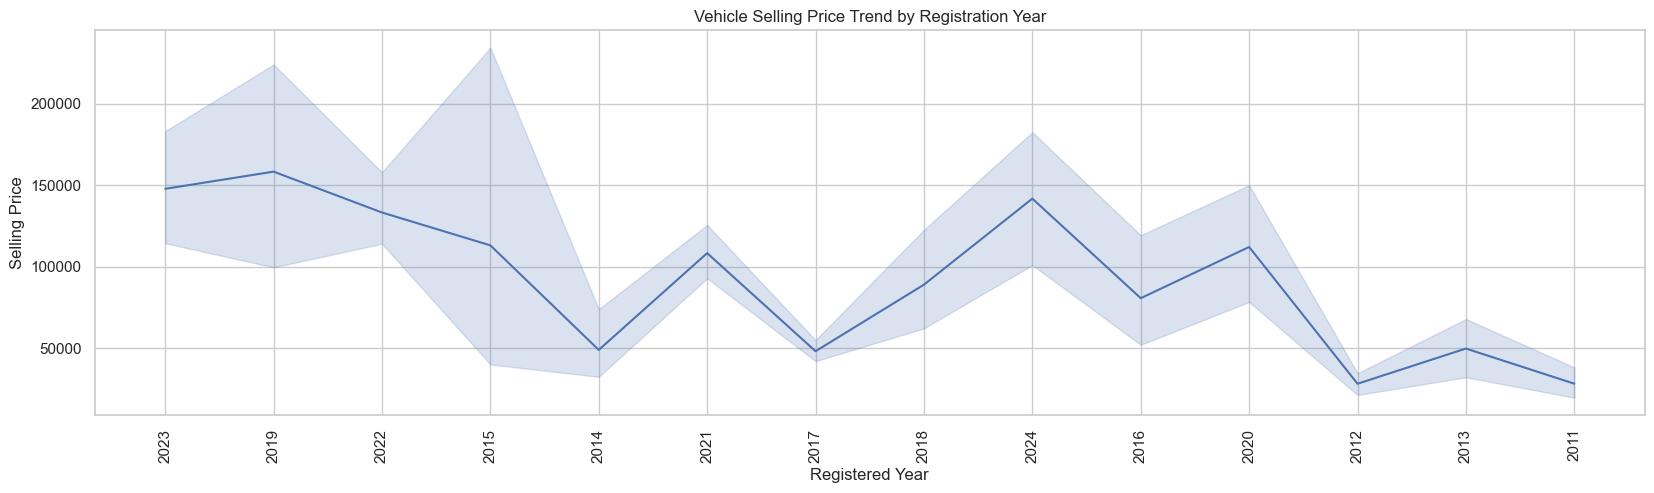

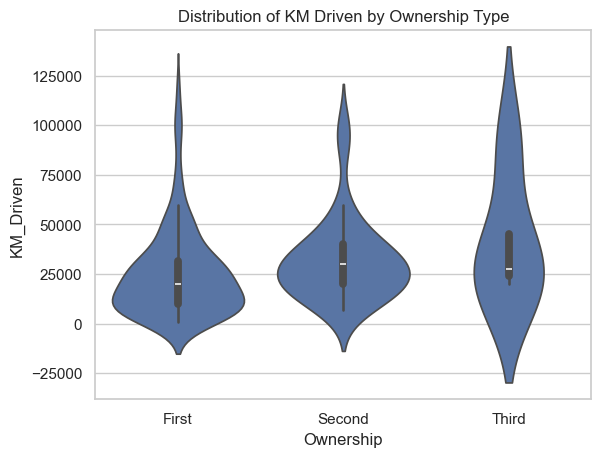

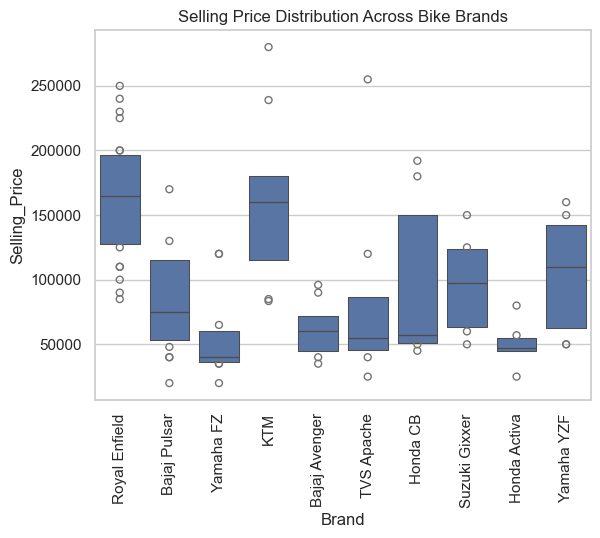

<Figure size 640x480 with 0 Axes>

In [648]:
plt.figure(figsize=(20, 5))

# Subplot 1
sns.lineplot(data=df,x='Manufactured_Year',y='Selling_Price')
plt.xticks(rotation = 90)
plt.xlabel('Registered Year')
plt.ylabel('Selling Price')
plt.title('Vehicle Selling Price Trend by Registration Year')
plt.show()

# Subplot 2
sns.violinplot(x='Ownership', y='KM_Driven', data=df)
plt.title('Distribution of KM Driven by Ownership Type')
plt.show()

# Subplot 3
sns.boxenplot(x='Brand', y='Selling_Price', data=df,order=df['Brand'].value_counts().index[:10])
plt.xticks(rotation = 90)
plt.title('Selling Price Distribution Across Bike Brands')
plt.show()

# Adjust layout
plt.tight_layout()
plt.show()